# Detecção de dígitos escritos à mão com dados de validação e teste

**Observação**: Verifiquem se o uso de GPU está habilitado.

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Baixando o conjunto de dados MNIST


O conjunto de dados MNIST de dígitos manuscritos, pode ser baixado com o [TF](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data).

O conjunto contém imagens 28x28 pixels em tons de cinza dos 10 dígitos (0-9).
Ele possui um conjunto de treinamento com 60.000 imagens e um conjunto de teste com 10.000.

In [2]:
(ltrain_images, ltrain_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

## Dividindo em o conjunto original de treinamento em um conjunto de treinamento menor e um conjunto de validação

### Separamos as primeiras 10.000 imagens para o conjunto de validação.

In [3]:
val_images = ltrain_images[:10000]
val_labels = ltrain_labels[:10000]

In [4]:
print(val_images.shape)
print(val_labels.shape)

(10000, 28, 28)
(10000,)


### As 50.000 restantes vão para o novo conjunto de treinamento (menor)

In [5]:
train_images = ltrain_images[10000:]
train_labels = ltrain_labels[10000:]

In [6]:
print(train_images.shape)
print(train_labels.shape)

(50000, 28, 28)
(50000,)


### Analisando o balanceamento das classes.

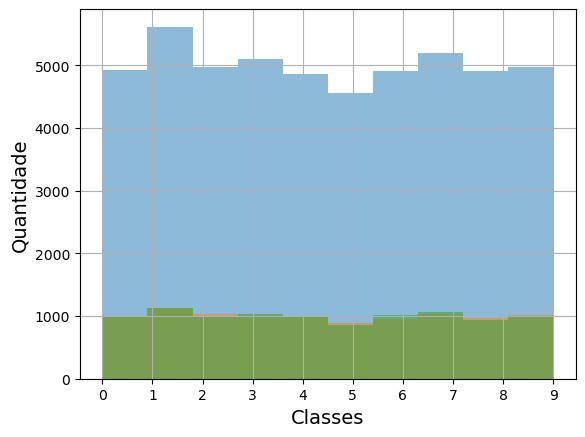

In [7]:
plt.hist(train_labels, alpha=0.5, label='Train')
plt.hist(test_labels, alpha=0.5, label='Val')
plt.hist(val_labels, alpha=0.5, label='Test')
plt.xticks(range(10))
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
plt.grid()
plt.show()

**Observação**

As classes estão razoavelmente equilibradas (i.e., balanceadas).

Isso é muito importante para que a rede não **veja** mais exemplos de uma classe do que outra, pois isso pode levá-la a ficar muito melhor naquela classe com maior quantidade de exemplos de treinamento do que nas outras.

## Pré-processamento dos dados

Vamos aplicar normalização aos dados (i.e., atributos) dos três conjuntos.

Como os valores dos pixels variam entre 0 e 255, basta dividí-los por 255.0 e o intervalo final ficará entre 0.0 e 1.0.

In [8]:
train_images  = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

## Definindo e compilando o modelo

**Observação**: ao invés de passar uma **lista** com as camadas, vamos usar o método `add()` da classe `Sequential` para adicionar as camadas

In [9]:
# Definindo o modelo.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Resumo da rede neural.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


### Compilando o modelo

Quando passamos a *string* `adam` para o parâmetro `optimizer`do método `compile`, por padrão, o otimizador `adam` usa um taxa de aprendizado de 0.001,

Porém, no caso deste exemplo, para ilustrar um problema que podemos encontrar durante o treinamento de redes neurais, queremos aumentá-lo para 0.01.

Para alterar o valor, devemos instanciar um objeto da classe `Adam` e especificar o valor que queremos para a taxa de aprendizagem através do parâmetro `learning_rate`.

In [10]:
# Instanciando otimizador Adam.
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compilando a rede neural.
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Treinando o modelo.

Passamos para o treinamento do modelo além do conjunto de treinamento, o conjunto de validação. Isso é feito através do parâmetro `validation_data`. 

Poderíamos deixar o conjunto de treinamento com todas as amostras e, alternativamente, usar:
- `validation_split=0.1` em vez de `validation_data=(val_images, val_labels)`.

Neste caso, o TensorFlow dividiria o conjunto original de treinamento em conjuntos de treinamento e validação automaticamente se baseando na porcentagem passada.

**Observação:** Notem que durante o treinamento, como passamos um conjunto de validação, os resultados impressos mostram a perda e a acurácia para ambos os conjuntos.

In [11]:
history = model.fit(
    train_images,
    train_labels,
    epochs=20,
    validation_data=(val_images, val_labels)
)

Epoch 1/20
1563/1563 [==============================] - 6s 3ms/step - loss: 0.3236 - accuracy: 0.9064 - val_loss: 0.2395 - val_accuracy: 0.9306
Epoch 2/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2349 - accuracy: 0.9313 - val_loss: 0.2749 - val_accuracy: 0.9186
Epoch 3/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2141 - accuracy: 0.9381 - val_loss: 0.2354 - val_accuracy: 0.9329
Epoch 4/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2057 - accuracy: 0.9404 - val_loss: 0.2156 - val_accuracy: 0.9395
Epoch 5/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1964 - accuracy: 0.9416 - val_loss: 0.2131 - val_accuracy: 0.9394
Epoch 6/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1912 - accuracy: 0.9438 - val_loss: 0.2481 - val_accuracy: 0.9352
Epoch 7/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1887 - accuracy: 0.9452 - val_loss: 0.2245 - val_accuracy:

**Observação**

Os valores da perda e da acurácia nos dois conjuntos praticamente nunca serão iguais.

Porém, nosso objetivo é encontrar uma arquitetura que faça com que ambos fiquem o mais próximo possível.

Valores próximos são um sinal de que a rede neural é boa em generalizar e que não está se especializando demais nos dados de treinamento (i.e., sobreajuste).

### Inspecionando os resultados obtidos ao longo do treinamento

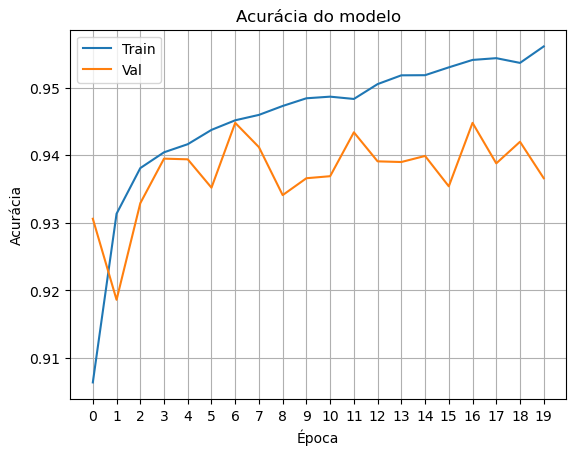

In [12]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(loc='upper left')
plt.xticks(range(20))
plt.grid()
plt.show()

**Observações**

A acurácia de validação está bastante instável, oscilando muito.

Nesse caso, o que pode estar acontecendo é que a taxa de aprendizado esteja alta demais.

Para tentar contornar isso, devemos reduzí-la.

Vamos começar de novo com um `learning_rate` mais baixo (por exemplo: 0.0001)

In [13]:
# Definindo o modelo.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Instanciando otimizador Adam.
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compilando a rede neural.
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Treinando o modelo.
history = model.fit(
    train_images,
    train_labels,
    epochs=20,
    validation_data=(val_images, val_labels)
)

Epoch 1/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.1323 - accuracy: 0.6961 - val_loss: 0.5824 - val_accuracy: 0.8602
Epoch 2/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4874 - accuracy: 0.8754 - val_loss: 0.4081 - val_accuracy: 0.8927
Epoch 3/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3864 - accuracy: 0.8944 - val_loss: 0.3525 - val_accuracy: 0.9041
Epoch 4/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3456 - accuracy: 0.9035 - val_loss: 0.3264 - val_accuracy: 0.9091
Epoch 5/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3225 - accuracy: 0.9092 - val_loss: 0.3086 - val_accuracy: 0.9138
Epoch 6/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3071 - accuracy: 0.9135 - val_loss: 0.2981 - val_accuracy: 0.9150
Epoch 7/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2960 - accuracy: 0.9161 - val_loss: 0.2890 - val_accuracy:

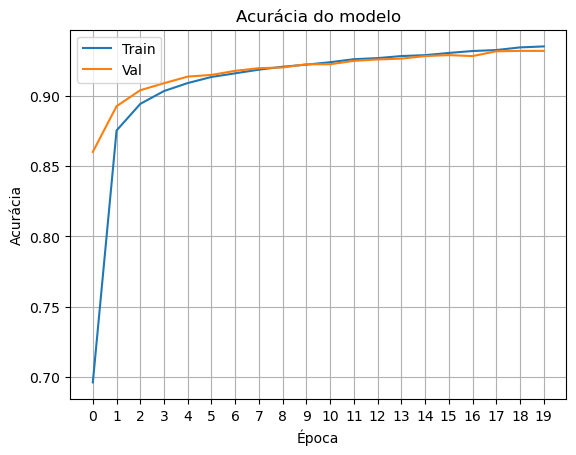

In [14]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(loc='upper left')
plt.xticks(range(20))
plt.grid()
plt.show()

**Observação**

As duas curvas convergem para valores bem próximos e a curva de acurácia com o conjunto de validação não apresenta mais instabilidade.

## Testando o modelo treinado nos três conjuntos


In [15]:
model.evaluate(train_images, train_labels)

1563/1563 [==============================] - 3s 2ms/step - loss: 0.2248 - accuracy: 0.9366


[0.2247665375471115, 0.9365599751472473]

In [16]:
model.evaluate(val_images, val_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2401 - accuracy: 0.9321


[0.24011589586734772, 0.9320999979972839]

In [17]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2356 - accuracy: 0.9349


[0.23557148873806, 0.9348999857902527]

**Observação**

Percebam que os três valores são razoavelmente altos e estão muito próximos uns dos outros.

Esse é um forte indicativo de que o modelo realmente descobriu um padrão geral por trás do conjunto de treinamento e consegue, com isso, classficar bem imagens inéditas.

Talvez consigamos aumentar a acurácia se treinarmos por mais épocas.

## Analisando resultados de classificação

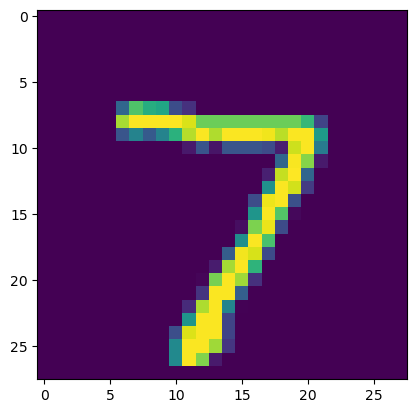

In [18]:
plt.imshow(test_images[0])
plt.show()

In [19]:
print(test_labels[0])

7


In [20]:
predictions = model.predict(test_images)
print(predictions[0])

313/313 [==============================] - 0s 941us/step
[1.1138240e-04 1.1225234e-08 3.2773346e-04 3.6766855e-03 2.1072119e-06
 3.3389653e-05 1.9837433e-08 9.9512696e-01 5.5778983e-05 6.6595379e-04]


In [21]:
# argmax: retorna os índices dos valores máximos ao longo de um eixo.
np.argmax(predictions[0])

7

In [22]:
predictions = np.argmax(predictions, axis=-1)
predictions.shape

(10000,)

In [23]:
predictions[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [24]:
test_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

## Visualizando o modelo

Podemos usar o [Netron](https://netron.app) para visualizar o modelo, hiperparâmetros, dimensões de tensores, etc.

O Netron é uma aplicação web para visualizar a arquitetura de redes neurais. (consulte [GitHub](https://github.com/lutzroeder/netron) para obter instruções sobre a instalação em seu computador).

Para podermos visualizar o modelo, devemos primeiro salvá-lo em um arquivo com extensão `.h5`.

In [25]:
model.save('MNIST_model.h5')